In [16]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import csv
import importlib
from scripts import proj1_helpers, helpers
from scripts import implementation, feature_processing, k_fold, model_linear
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
train_path = '../data/train.csv'
test_path  = '../data/test.csv'
output_path = '../data/linear_processed_submission.csv'

In [ ]:
# loading data
y, X, idx = proj1_helpers.load_csv_data(train_path)
y_t, X_t, ids_t = proj1_helpers.load_csv_data(test_path)

In [ ]:
X_p = feature_processing.process_X(X)
X_t_p = feature_processing.process_X(X_t)

100%|██████████| 20/20 [00:01<00:00, 18.78it/s]


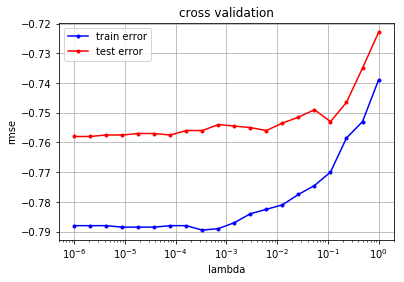

In [39]:
#Linear
model = implementation.ridge_regression
loss = model_linear.compute_accuracy_loss

idx_min, rmse_all, lambdas = k_fold.cross_validation_select(X_p[:2000,:], y[:2000], model, loss, seed = 1,
                                                            k_fold = 2, N = 20, do_plot = True, do_tqdm = True)

In [45]:
#Logistic
y_01 = helpers.y_to_01(np.array([y]).T)
w0 = np.random.randn(X_p.shape[1], 1)

In [46]:
y_01

array([[ 1.],
       [ 0.],
       [ 0.],
       ..., 
       [ 1.],
       [ 0.],
       [ 0.]])

In [50]:
model = implementation.reg_logistic_regression
model_args = {'initial_w': w0, 'max_iters': 100, 'gamma': 1e-8, 'debug': False}
loss = model_logistic.reg_loss

idx_min, rmse_all, lambdas = k_fold.cross_validation_select(X_p[:2000,:], y_01[:2000], model, loss, kw_model = model_args, seed = 1,
                                                            k_fold = 3, N = 10, do_plot = True, do_tqdm = False)

KeyboardInterrupt: 

In [ ]:
lambda_ = lambdas[idx_min]
w, l = model(y, X_p, lambda_ = lambda_)

In [28]:
y_pred = proj1_helpers.predict_labels(w, X_t_p)
proj1_helpers.create_csv_submission(ids_t, y_pred, output_path)